# BEE 4750 Homework 4: Generating Capacity Epxansion

**Name**:

**ID**:

> **Due Date**
>
> Friday, 10/27/23, 9:00pm

## Overview

### Instructions

-   In Problem 1, you will formulate, solve, and analyze a standard
    generating capacity expansion problem.
-   In Problem 2, you will add a CO<sub>2</sub> constraint to the
    capacity expansion problem and identify changes in the resulting
    solution.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

In [2]:
using JuMP
using HiGHS
using DataFrames
using Plots
using Measures
using CSV
using MarkdownTables

## Problems (Total: 100 Points)

For this problem, we will use hourly load (demand) data from 2013 in New
York’s Zone C (which includes Ithaca). The load data is loaded and
plotted below in <a href="#fig-demand" class="quarto-xref">Figure 1</a>.


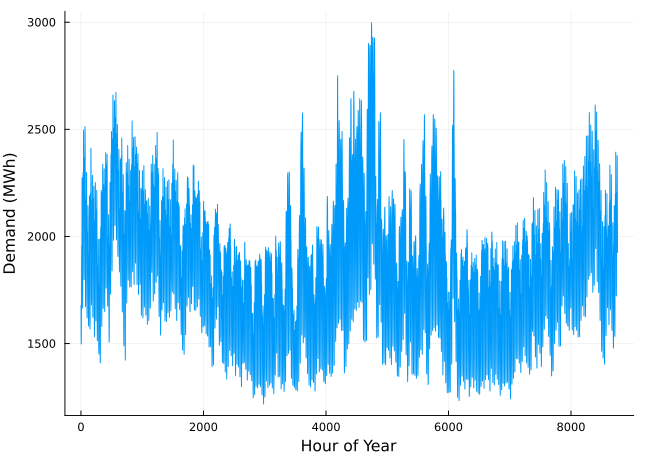

In [3]:
# load the data, pull Zone C, and reformat the DataFrame
NY_demand = DataFrame(CSV.File("data/2013_hourly_load_NY.csv"))
rename!(NY_demand, :"Time Stamp" => :Date)
demand = NY_demand[:, [:Date, :C]]
rename!(demand, :C => :Demand)
demand[:, :Hour] = 1:nrow(demand)

# plot demand
plot(demand.Hour, demand.Demand, xlabel="Hour of Year", ylabel="Demand (MWh)", label=:false)

Next, we load the generator data. This data includes fixed costs (\$/MW
installed), variable costs (\$/MWh generated), and CO<sub>2</sub>
emissions intensity (tCO<sub>2</sub>/MWh generated).

``` julia
gens = DataFrame(CSV.File("data/generators.csv"))
markdown_table(gens)
```

| Plant      | FixedCost | VarCost | Emissions |
|------------|-----------|---------|-----------|
| Geothermal | 450000    | 0       | 0.0       |
| Coal       | 220000    | 21      | 1.0       |
| NG CCGT    | 82000     | 25      | 0.43      |
| NG CT      | 65000     | 35      | 0.55      |
| Wind       | 91000     | 0       | 0.0       |
| Solar      | 70000     | 0       | 0.0       |

Finally, we load the hourly solar and wind capacity factors, which are
plotted in <a href="#fig-cf" class="quarto-xref">Figure 2</a>. These
tell us the fraction of installed capacity which is expected to be
available in a given hour for generation (typically based on the average
meteorology).

``` julia
# load capacify factors into a DataFrame
cap_factor = DataFrame(CSV.File("data/wind_solar_capacity_factors.csv"))

# plot January capacity factors
p1 = plot(cap_factor.Wind[1:(24*31)], label="Wind")
plot!(cap_factor.Solar[1:(24*31)], label="Solar")
xaxis!("Hour of the Month")
yaxis!("Capacity Factor")

p2 = plot(cap_factor.Wind[4344:4344+(24*31)], label="Wind")
plot!(cap_factor.Solar[4344:4344+(24*31)], label="Solar")
xaxis!("Hour of the Month")
yaxis!("Capacity Factor")

display(p1)
display(p2)
```

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div id="fig-cf-1"
class="output display_data" data-ref-parent="fig-cf" width="100.0%"
data-layout-align="center" data-fig.extended="false">
<div class="cell raw">
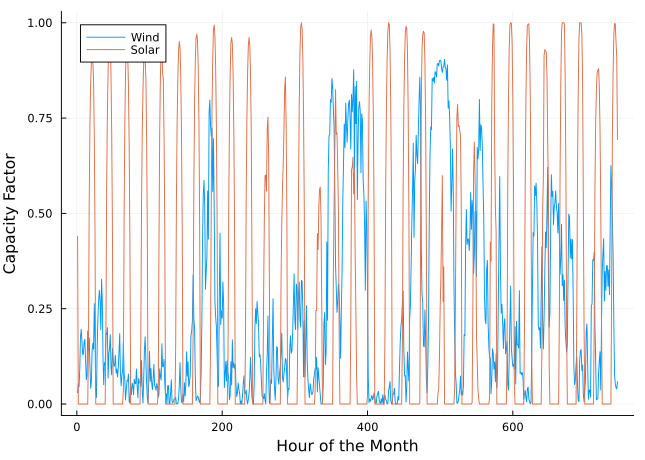
</div>
<p>(a) January</p>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div id="fig-cf-2"
class="output display_data" data-ref-parent="fig-cf" width="100.0%"
data-layout-align="center" data-fig.extended="false">
<div class="cell raw">
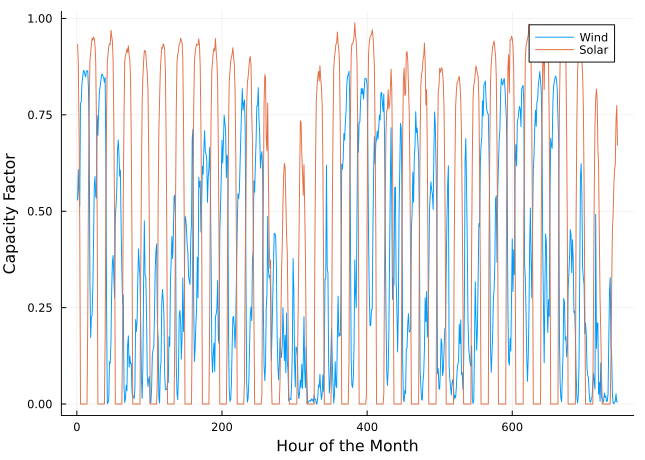
</div>
<p>(b) July</p>
</div></td>
</tr>
</tbody>
</table>

Figure 2: Hourly solar and wind capacity factors.

You have been asked to develop a generating capacity expansion plan for
the utility in Riley, NY, which currently has no existing electrical
generation infrastructure. The utility can build any of the following
plant types: geothermal, coal, natural gas combined cycle gas turbine
(CCGT), natural gas combustion turbine (CT), solar, and wind.

While coal, CCGT, and CT plants can generate at their full installed
capacity, geothermal plants operate at maximum 85% capacity, and solar
and wind available capacities vary by the hour depend on the expected
meteorology. The utility will also penalize any non-served demand at a
rate of \$1000/MWh.

> **Significant Digits**
>
> Use `round(x; digits=n)` to report values to the appropriate
> precision!

### Problem 1 (55 points)

Your first task is to find a capacity expansion plan which minimizes
total costs of investment and operation.

#### Problem 1.1 (5 points)

Identify and define the decision variables for the problem. Make sure to
include units.

#### Problem 1.2 (10 points)

Formulate the objective function. Make sure to include any needed
derivations or justifications for your equation(s).

#### Problem 1.3 (10 points)

Derive all relevant constraints. Make sure to include any needed
justifications or derivations. Why is your set of constraints complete?

#### Problem 1.4 (10 points)

Implement your optimization problem in `JuMP`.

#### Problem 1.5 (10 points)

Find the optimal solution. How much should the utility build of each
type of generating plant? What will the total cost be? How much energy
will be non-served?

#### Problem 1.6 (10 points)

Plot how much electricity will be generated under this plan each hour by
each type of plant. Make both a line plot for the raw amounts (using
`plot`) and a stacked area plot to show relative contributions to the
total demand (using `areaplot`). What are your take-aways? Do your
results make sense?

### Problem 2 (45 points)

The NY state legislature is considering enacting an annual
CO<sub>2</sub> limit, which for the utility would limit the emissions in
its footprint to 1.5 MtCO<sub>2</sub>/yr.

#### Problem 2.1 (10 points)

What changes are needed to your linear program from Problem 1?
Re-formulate the problem and report it in standard form.

#### Problem 2.2 (10 points)

Implement the new optimization problem in `JuMP`.

#### Problem 2.3 (10 points)

Find the optimal solution. How much should the utility build of each
type of generating plant? What is different from your plan from Problem
1?

#### Problem 2.4 (10 points)

Plot how much electricity will be generated under this plan each hour by
each type of plant. Make both a line plot for the raw amounts (using
`plot`) and a stacked area plot to show relative contributions to the
total demand (using `areaplot`). What is different from your plan in
Problem 1? Do these results make sense?

#### Problem 2.5 (5 points)

What would the value to the utility be of allowing it to emit an
additional 1000 tCO<sub>2</sub>/yr? An additional 5000?

## References

List any external references consulted, including classmates.